<a href="https://colab.research.google.com/github/LeTrungDunggg/LeTrungDunggg/blob/main/FOOD_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/HW13/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 807 images belonging to 10 classes.


In [ ]:
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/HW13/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 47 images belonging to 10 classes.


In [ ]:
training_data.class_indices

{'banhchung': 0,
 'banhcuon': 1,
 'banhpia': 2,
 'banhxeo': 3,
 'bundau': 4,
 'canhchua': 5,
 'miquang': 6,
 'nemran': 7,
 'raumuongxao': 8,
 'xoixeo': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 512 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                  

In [ ]:
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(training_data,epochs=500,batch_size=100,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
26/26 [==============================] - 11s 393ms/step - loss: 2.6744 - accuracy: 0.0830 - val_loss: 2.3019 - val_accuracy: 0.1064
Epoch 2/500
26/26 [==============================] - 10s 378ms/step - loss: 2.2997 - accuracy: 0.1202 - val_loss: 2.2909 - val_accuracy: 0.1489
Epoch 3/500
26/26 [==============================] - 10s 377ms/step - loss: 2.2435 - accuracy: 0.1425 - val_loss: 2.2612 - val_accuracy: 0.1702
Epoch 4/500
26/26 [==============================] - 10s 376ms/step - loss: 2.2254 - accuracy: 0.1995 - val_loss: 2.3079 - val_accuracy: 0.1064
Epoch 5/500
26/26 [==============================] - 10s 373ms/step - loss: 2.3020 - accuracy: 0.1041 - val_loss: 2.3049 - val_accuracy: 0.1064
Epoch 6/500
26/26 [==============================] - 10s 372ms/step - loss: 2.2795 - accuracy: 0.1301 - val_loss: 2.2367 - val_accuracy: 0.1702
Epoch 7/500
26/26 [==============================] - 10s 371ms/step - loss: 2.2902 - accuracy: 0.1338 - val_loss: 2.2625 - val_accuracy:

<function matplotlib.pyplot.show>

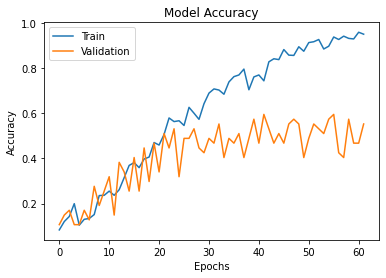

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Final.h5")

In [ ]:
model_CNN=load_model('Final.h5')

banhchung


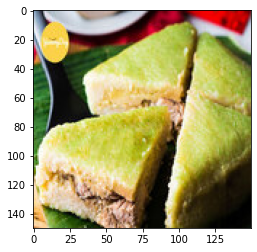

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/banhchung/hinh1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

banhchung


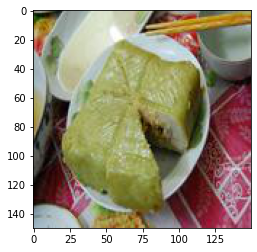

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/banhchung1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

banhpia


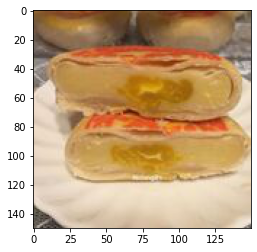

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/banhpia/385.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

banhpia


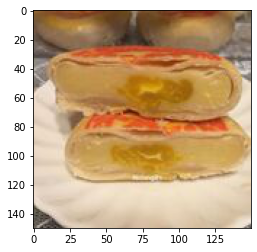

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/banhpia/385.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

bundau


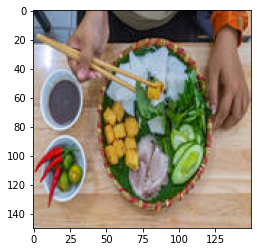

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/bundau/bundau5.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

banhxeo


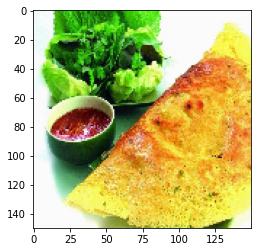

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/banhxeo/bxeo6.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

banhxeo


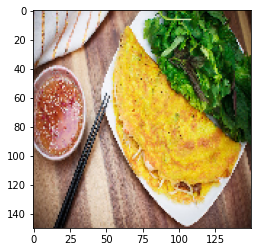

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/bxeo.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

banhcuon


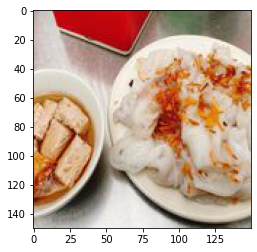

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/banhcuon/1038.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

canhchua


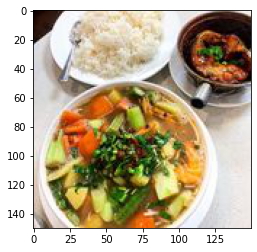

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/canhchua/815.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

miquang


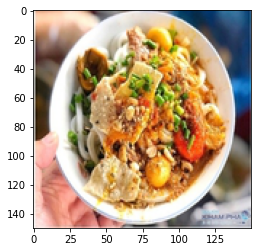

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/miquang/miquang1.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

miquang


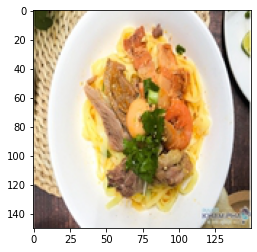

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/miquang/miquang3.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

nemran


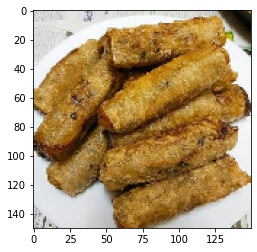

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/nemran/photo.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

raumuongxao


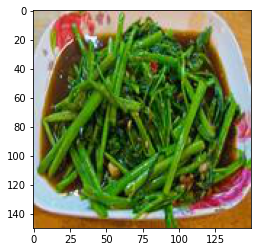

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/raumuongxao/raumuong4.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
if round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)

xoixeo


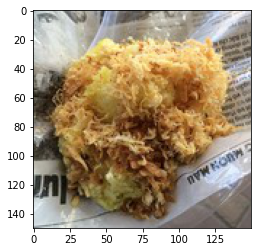

In [ ]:
img=load_img('/content/drive/MyDrive/AI/HW13/test/xoixeo/519.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhcuon'
if round(result[0][2])==1:
  prediction='banhpia'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bundau'
if round(result[0][5])==1:
  prediction='canhchua'
elif round(result[0][6])==1:
  prediction='miquang'
if round(result[0][7])==1:
  prediction='nemran'
if round(result[0][8])==1:
  prediction='raumuongxao'
if round(result[0][9])==1:
  prediction='xoixeo'
print(prediction)